## **Introduction to Image Processing, Computer Vision and Deep Learning**
- Project-2
- 2023/12/22

### Table of Contents：
1. **Hough Circle Transform**	 
    - 1.1 Draw Contour
    - 1.2 Count Rings
2. **Histogram Equalization**
3. **Morphology Operation**
    - 3.1 Closing
    - 3.2 Opening
4. **Training a MNIST Classifier Using VGG19 with BN**
    - 4.1 Load Model and Show Model Structure. 
    - 4.2 Show Training/Validating Accuracy and Loss. 
    - 4.3 Use the Model with Highest Validation Accuracy to Run Inference, Show the Predicted Distribution and Class Label. 
5. **Train a Cat-Dog Classifier Using ResNet50**
    - 5.1 Load the dataset and resize images
    - 5.2 Show the structure of ResNet50 model
    - 5.3 Improve ResNet50 with Random-Erasing  and Compare the accuracies of 2 ResNet50 models on validation dataset
    - 5.4 Use the trained model to run inference and show the predicted class label


In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Dec 22 14:38:43 2023
@author: Mr.Jiang
"""
import cv2
import numpy as np
from numpy import zeros, dot, exp, mgrid, pi, ravel, uint8, square
# from PyQt5.QtWidgets import QApplication, QMainWindow, QLabel, QPushButton, QPlainTextEdit, QLineEdit, QGraphicsView, QGraphicsScene, QFileDialog
# from PyQt5.QtGui import QIcon, QPixmap
# from PyQt5.QtCore import Qt
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets
from torchvision.models import vgg19_bn, resnet50
from torch.utils.data import DataLoader
from torch.optim.lr_scheduler import StepLR
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary
import torch.optim as optim
import torchvision.models as models
from sklearn.model_selection import train_test_split
from IPython.display import display, Image
from PIL import Image as PILImage
import random
import sys
import io


In [ ]:
# run on Kaggle
import os

# Kaggle input / working
os.listdir("/kaggle/working/") # reset
print(os.listdir('/kaggle/input/hw2-q5-inference-dataset/Hw2_Q5_inference_dataset/'))


1.1 Buttom clicked
image shape：(118, 255, 3)


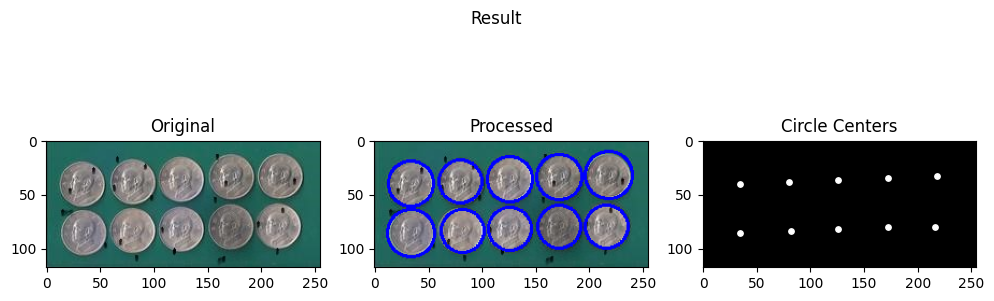

In [75]:
# 1.1 Draw Contour--------------------------------------------------------

class Q11():
    def Draw_Contour():
        print("1.1 Buttom clicked")
        image = cv2.imread('/kaggle/input/dataset-opencvdl-hw2/Dataset_OpenCvDl_Hw2/Dataset_OpenCvDl_Hw2/Q1/coins.jpg')

        if image is not None:
            print(f"image shape：{image.shape}")
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            blurred = cv2.GaussianBlur(gray, (9, 9), 0)

            # inspect circles
            circles = cv2.HoughCircles(
                blurred, # for improving accuracy, usually get blurred first to reduce noise
                cv2.HOUGH_GRADIENT,
                dp=1,
                minDist=30,
                param1=50,
                param2=30,
                minRadius=10,
                maxRadius=50
            )

            '''
            cv2.HoughCircles() inspect circles calculate by gradient
            circles 是三維 np.ndarray
                - 第一維度表示偵測到的圓形集合
                - 第二維度表示每個圓形的參數
                - 第三維度表示每個圓形的參數值 (x, y, r)

            Ex. circles = [[[100, 150, 30],  # 第一個圓形：圓心 (100, 150)，半徑 30
                            [250, 200, 40],  # 第二個圓形：圓心 (250, 200)，半徑 40
                            [400, 300, 50]]] # 第三個圓形：圓心 (400, 300)，半徑 50
                circles.shpae = (1,3,3)
            '''
            # circles[0] 降維 circles.shpae = (1,10,3) -> (10,3)
            if circles is not None:
                circles = np.round(circles[0]).astype("int")

            # draw circles
            for (x, y, r) in circles:
                processed_image = cv2.circle(image, (x, y), r,(255, 0, 0), 2)
            '''
            cv2.circle(...) 在影像上繪製圓形
                - image: target
                - (255, 0, 0): 顏色，以 BGR 格式表示，(255, 0, 0) 代表藍色
                - 2: 圓形邊緣線條粗細，以像素為單位
                - 會直接修改傳入的 image
            '''
            # recover image
            image = cv2.imread('/kaggle/input/dataset-opencvdl-hw2/Dataset_OpenCvDl_Hw2/Dataset_OpenCvDl_Hw2/Q1/coins.jpg')

            # set a 118 x 255 / 3 channal = 0 black_image
            black_image = np.zeros((118, 255, 3), dtype=np.uint8)

            # display
            plt.figure(figsize=(12, 4))

            '''
            OpenCV channel: BGR
            Matplotlib.imshow() channel: RGB -> need cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            '''

            # 1,3,1 mean 1 row 3 col first subplot
            plt.subplot(1,3,1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original')
            plt.subplot(1,3,2), plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB)), plt.title('Processed')
            plt.subplot(1,3,3), plt.imshow(cv2.cvtColor(black_image, cv2.COLOR_BGR2RGB)), plt.title('Circle Centers')
            plt.scatter(circles[:, 0], circles[:, 1], c='white', marker='o' ,s=15)
            fig = plt.gcf()
            fig.suptitle("Result")
            plt.show()

        else:
            print("請先選擇圖片")

q11 = Q11()
Q11.Draw_Contour()


1.2 Buttom clicked
Coin counts：1
Coin counts：2
Coin counts：3
Coin counts：4
Coin counts：5
Coin counts：6
Coin counts：7
Coin counts：8
Coin counts：9
Coin counts：10
There are 10 coins in the image.


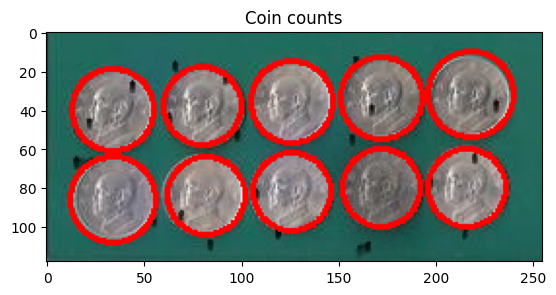

In [79]:
# 1.2 Count Coins--------------------------------------------------------

class Q12():
    def Count_Coins(self):
        print("1.2 Buttom clicked")
        image = cv2.imread('/kaggle/input/dataset-opencvdl-hw2/Dataset_OpenCvDl_Hw2/Dataset_OpenCvDl_Hw2/Q1/coins.jpg')

        if image is not None:
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            blurred = cv2.GaussianBlur(gray, (9, 9), 0)

            # THRESH_BINARY
            # _, thresh = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY)
            '''
            cv2.threshold()
                - blurred: input
                - 100: threshold。
                - 255: max for all pixel > threshold
                - cv2.THRESH_BINARY: 表示二值閾值處理，將像素值分為兩類：1.< threshold / 2.=> threshold
            '''

            # inspect contours
            # contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            '''
            cv2.findContours()
                - cv2.RETR_EXTERNAL：只檢索最外層的輪廓
                - cv2.CHAIN_APPROX_SIMPLE：壓縮水平、垂直和對角線段，只保留端點
            '''

            # inspect contours
            circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1, minDist=20, param1=50, param2=30, minRadius=10, maxRadius=50)
            if circles is not None:
                circles = np.round(circles[0, :]).astype("int")

            coin_count = 0 # initialize
            for (x, y, r) in circles:
                processed_image = cv2.circle(image, (x, y), r,(0, 0, 255), 2)
                coin_count += 1
                print(f"Coin counts：{coin_count}")

            # display
            print("There are {} coins in the image.".format(coin_count))
            plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB)), plt.title('Coin counts')
            plt.show

        else:
            print("請先選擇圖片")

q12 = Q12()
q12.Count_Coins()


### **機率密度函數（PDF）vs. 累積分佈函數（CDF）**

1. **PDF（Probability Density Function）**描述一個連續隨機變數在某個數值附近出現的相對可能性。對於離散變數，對應的概念是**機率質量函數（PMF, Probability Mass Function）**。

    - **應用**：
        1. 在影像處理中，PDF 可用來**分析像素強度的分佈**，**描述影像中每個像素亮度的相對頻率**，如：直方圖均衡化（Histogram Equalization）
        2. 在機器學習中，PDF 可幫助**建模變數的機率分佈**，如：高斯分佈應用於 Naïve Bayes classifier

2. **CDF（Cumulative Distribution Function）** 描述**隨機變數 X <= 某個值 x 的機率**。

    - **應用**
        1. 在影像處理中，CDF 可用於直方圖均衡化，**均衡化像素強度，使影像的亮度分佈更均勻**
        3. 在統計學中，CDF 可用來計算分位數（quantiles）
        4. 在機器學習中，CDF 可用來計算特定範圍內變數的機率，如： Gaussian Naïve Bayes classifier

3. **圖像處理中的 PDF 和 CDF**
- 在影像處理領域，PDF 和 CDF 經常用於直方圖均衡化（Histogram Equalization）：
    - PDF（像素強度分佈）：描述變數取某個值的機率密度，在影像處理中對應於**灰度直方圖**，描述影像中每個像素亮度的相對頻率。
    - CDF（累積機率）：描述變數小於某個值的累積機率，在影像處理中用於**直方圖均衡化**，用於均衡化像素強度，使影像對比度更均勻。

- **步驟**：
    1. **計算影像灰階直方圖（PDF）**。
    2. **根據 PDF 計算 CDF**。
    3. **使用 CDF 對影像進行像素映射，使亮度分佈更均勻**。


2. Buttom clicked
image shape：(827, 1300, 3)


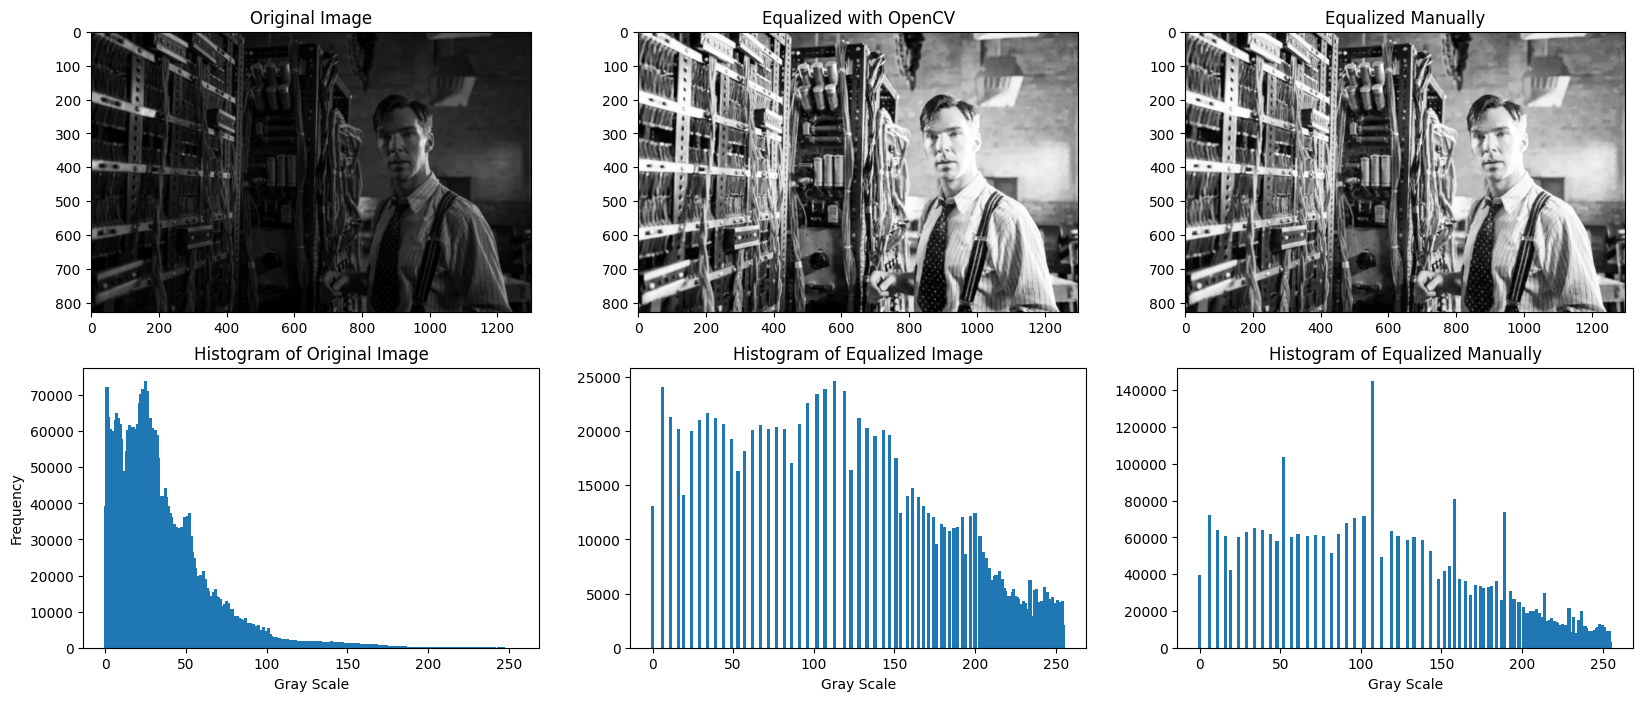

In [17]:
# 2. Histogram Equalization----------------------------------------------

class Q2():
    def Histogram_Equalization(self):
        print("2. Buttom clicked")
        image = cv2.imread('/kaggle/input/dataset-opencvdl-hw2/Dataset_OpenCvDl_Hw2/Dataset_OpenCvDl_Hw2/Q2/histoEqualGray2.png')

        if image is not None:
            print(f"image shape：{image.shape}") # (827, 1300, 3)
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            # display
            plt.figure(figsize=(20, 8))

            # Origine--------------------------------------------------------------------------

            # origine subplot(2, 3, 1)
            plt.subplot(2, 3, 1)
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.title('Original Image')

            # histogram of origine subplot(2, 3, 4)
            plt.subplot(2, 3, 4)
            hist_original, bins_original = np.histogram(image.flatten(), 256)
            '''
            np.histogram(a, bins=10, range=None, normed=None, weights=None, density=None)
                - image.flatten(): covert image to 1 shape(hight * width * channel) ndarray for inputting np.histogram()
                - 256：直方圖的 bins(colors) 區間數量 0 ~ 255
                - hist_original: ndarray, for all bins(colors) counts(pixels)
                - bins_original: ndarrau, for all bins(colors) board values

            hist_original = [39351 72195 64041 60639 42297 60039 63108 64974 63765 61953 57960 48990
                                 0 54645 60411 61626 60681 61221 60741 51276 61890 67887 70359 71802
                               ......
                               111   102    57     0    69    63    54    75    24    21    27    33
                                33    30    15     9]
            '''

            plt.bar(range(256), hist_original, width=2)
            plt.xlabel("Gray Scale")
            plt.ylabel("Frequency")
            plt.title('Histogram of Original Image')

            # Equalized----------------------------------------------------------------------------

            # cv2.equalizeHist()
            equalized_image_opencv = cv2.equalizeHist(gray_image)
            '''
            cv2.equalizeHist() 增強影像對比度
            重新分配影像的像素值，使得影像的直方圖更加均勻分布，從而使影像的亮度和對比度更加均衡
            '''

            # Equalized with OpenCV subplot(2, 3, 2)
            plt.subplot(2, 3, 2)
            plt.imshow(cv2.cvtColor(equalized_image_opencv,cv2.COLOR_BGR2RGB))
            plt.title('Equalized with OpenCV')

            # histogram of equalized subplot(2, 3, 5)
            plt.subplot(2, 3, 5)
            hist_equalized_opencv, bins_equalized_opencv = np.histogram(equalized_image_opencv.flatten(), 256)
            plt.bar(range(256), hist_equalized_opencv, width=2)
            plt.xlabel("Gray Scale")
            # plt.ylabel("Frequency")
            plt.title('Histogram of Equalized Image')

            # Equalize manually----------------------------------------------------------------

            # calculate PDF and CDF
            pdf_original = hist_original / sum(hist_original)
            cdf_original = np.cumsum(pdf_original)
            lookup_table = np.round(255 * cdf_original).astype(np.uint8) # np.round() 四捨五入
            '''
            pdf_original = [ 1.22007255e-02 2.23839643e-02 1.98558274e-02 1.88010418e-02
                             1.31141289e-02 1.86150126e-02 1.95665519e-02 2.01451028e-02
                             ......
                             7.44116826e-06 6.51102223e-06 8.37131430e-06 1.02316064e-05
                             1.02316064e-05 9.30146033e-06 4.65073016e-06 2.79043810e-06 ]

            cdf_original = [ 0.01220073 0.03458469 0.05444052 0.07324156 0.08635569 0.1049707
                             0.12453725 0.14468236 0.16445261 0.18366105 0.20163148 0.21682076
                             ......
                             0.99991722 0.99994047 0.99994791 0.99995442 0.99996279 0.99997303
                             0.99998326 0.99999256 0.99999721 1.]

            lookup_table = [   3   9  14  19  22  27  32  37  42  47  51  55  55  60  64  69  74  79
                              84  88  93  98 104 109 109 115 121 125 130 134 139 144 149 153 156 159
                             ......
                             255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
                             255 255 255 255 ]

            lookup_table 的 index 對應到原始圖片的 pixel，而該 index 的值則是均衡化後的新 pixel
            '''

            # use lookup_table for mapping
            manually_equalized_image = lookup_table[image]

            # Equalized Manually subplot(2, 3, 3)
            plt.subplot(2, 3, 3)
            plt.imshow(cv2.cvtColor(manually_equalized_image, cv2.COLOR_BGR2RGB))
            plt.title('Equalized Manually')

            # histogram of equalized manually subplot(2, 3, 6)
            plt.subplot(2, 3, 6)
            hist_equalized_manually , bins_equalized_manual = np.histogram(manually_equalized_image.flatten(), 256)
            plt.bar(range(256), hist_equalized_manually, width=2)
            plt.xlabel("Gray Scale")
            # plt.ylabel("Frequency")
            plt.title('Histogram of Equalized Manually')

            plt.show()
        else:
            print("請先選擇圖片")

q2 = Q2()
q2.Histogram_Equalization()


### **腐蝕（Erosion）**

- 在影像處理中的是一種基本的**形態學操作（Morphological Operation）**，主要應用在**二值圖像（二值化後的黑白影像）** 上，常用於：

| 應用場景 | 說明 |
|---------|------|
| **雜訊去除** | 腐蝕可以移除小的白點雜訊（如影像中小亮點） |
| **前景分離** | 縮小物體面積，幫助與背景或其他物體分開 |
| **邊界偵測** | 搭配膨脹（dilation）可以計算物體邊界 |
| **連通區塊分析** | 有助於提取或標記獨立的物體輪廓 |
       
- **腐蝕操作會讓白色區域（通常是前景）變小、黑色區域（背景）變大**，過程模擬「沙子被侵蝕」的感覺，邊界的白色像素會被慢慢吃掉。其核心在於一個叫做「**結構元素（structuring element/kernel）**」的小窗口，它滑過整張圖像並應用某種規則來決定中心像素是否保留。

- **視覺化例子**：
    - 假設一小段影像（1 是白 or 前景，0 是黑 or 背景）：

```
原始圖像：
0 1 1 1 0  
1 1 1 1 1  
1 1 1 1 1  
0 1 1 1 0  
```

```
使用 3x3 結構元素進行腐蝕後，中心的「白區」會縮小，邊緣白色像素會變黑，留下中心區域，腐蝕運算會傾向於將結構元素覆蓋區域內的像素變為該區域的「最小值」：
1 1 1  
1 1 1  
1 1 1  
```

```
如果「結構元素覆蓋的區域內有任何黑色像素，中心像素在腐蝕後就會變成黑色」：
0 0 0 0 0
0 0 1 0 0
0 0 1 0 0
0 0 0 0 0
```


### **膨脹（Dilation)**

- 通常與「腐蝕（Erosion）」搭配使用，對象主要是**二值圖像（二進制圖像）**，膨脹的效果與腐蝕相反，用來**擴大白色區域（前景）**。**膨脹會使影像中白色區域（通常代表物體或前景）擴大、變粗，黑色區域（背景）變小**，如同一滴墨水滴在紙上慢慢擴散，膨脹操作就像讓影像的「白色」慢慢向外擴展，實際應用用來**填補小孔洞或連接碎片**。

| 應用 | 說明 |
|------|------|
| **填補孔洞** | 把物件中小的黑色孔洞「擴展」成白色 |
| **連接斷裂的區域** | 把物體的分離部分連接起來，例如斷掉的文字筆畫 |
| **擴大目標區域** | 讓特定區域變得更「粗」，方便檢測 |
| **去除黑色雜點** | 小的黑點會被鄰近的白色區域吞噬 |

1. **車牌識別**：膨脹幫助連接斷裂的字元
2. **醫學影像**：強化病變區域，便於分割
3. **OCR（文字識別）**：讓細碎文字筆畫更連續
  
- **視覺化例子**：
    - 假設一小段影像（1 是白 or 前景，0 是黑 or 背景）：
    - 結構元素滑過整張圖像
    - 若滑動範圍中 **有任何一個像素是白（1），中心像素就設為白**；否則為黑（0）

```
0 0 0 0 0  
0 0 1 0 0  
0 1 1 1 0  
0 0 1 0 0  
0 0 0 0 0  
```

```
使用 3x3 的結構元素，選擇不同形狀和大小的 kernel，可以控制膨脹的方向與強度：
1 1 1  
1 1 1  
1 1 1  
```

```
膨脹後的結果是「中心區域周圍也會變成白色」：
0 1 1 1 0  
1 1 1 1 1  
1 1 1 1 1  
1 1 1 1 1  
0 1 1 1 0  
```

### **結構元素（Structuring Element）aka. Convolution kernel** 
- 決定操作的強度和方向，選擇不同形狀的 kernel 會導致不同的效果
- OpenCV 提供幾種常見的結構元素：
  
| 結構元素範例 | 說明 |
|--------------|------|
| `cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))` | 3x3 方形 |
| `cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))` | 橢圓形核 |
| `cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))` | 十字形核 |

### **腐蝕 vs 膨脹（Erosion vs Dilation）**

| 操作 | 效果 | 說明 |
|------|------|------|
| **腐蝕（Erosion）** | 白區縮小 | 前景邊界收縮，適合去噪 |
| **膨脹（Dilation）** | 白區擴大 | 前景邊界擴展，填補孔洞 |

兩者經常**組合使用**：
- **Opening（開運算）** = **先腐蝕後膨脹 → 去除白色雜訊、保留整體形狀**
- **Closing（閉運算）** = **先膨脹後腐蝕 → 填補黑洞、連接白色物體**


3.1 Buttom clicked


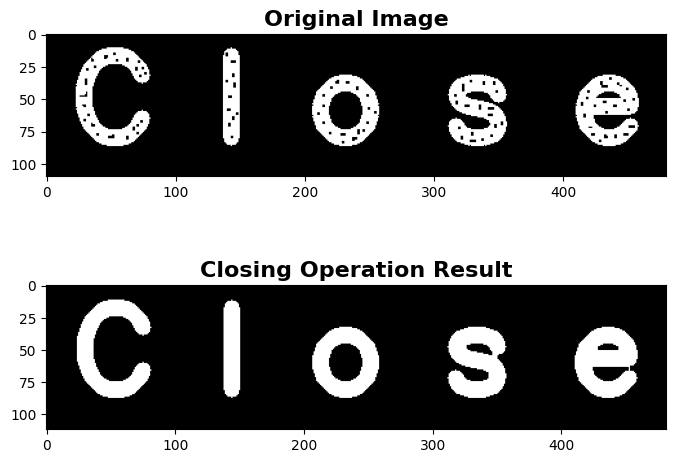

In [3]:
# 3.1 Morphology Closing-------------------------------------------------

class Q31():
    def Morphology_Closing(self):
        print("3.1 Buttom clicked")
        image = cv2.imread('/kaggle/input/dataset-opencvdl-hw2/Dataset_OpenCvDl_Hw2/Dataset_OpenCvDl_Hw2/Q3/closing.png')

        if image is not None:
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            # Binary for 0 and 255
            threshold = 127
            binary_image = (gray_image > threshold).astype(np.uint8) * 255

            # Pad the image with zeros based on the kernel size (K=3)
            kernel_size = 3
            padded_image = np.pad(binary_image, pad_width=kernel_size // 2, mode='constant', constant_values=0)
            '''
            np.pad(...): 用於在陣列的邊緣填充數值（padding），「需要填充的寬度，等於 kernel_size 的一半」
                pad_width = kernel_size // 2: 填充的寬度 = 1。表示影像的每個邊緣（上、下、左、右）都填充 1 個像素寬度的邊框
                mode='constant': 用一個固定的數值來填充
                constant_values=0: 指定了填充邊緣的常數值為 0。
            '''

            # Define a 3x3 all-ones structuring element aka. Convolution kernel
            structuring_element = np.ones((kernel_size, kernel_size), dtype=np.uint8)

            # dilation operation
            dilated_image = np.zeros_like(padded_image)
            for i in range(kernel_size // 2, padded_image.shape[0] - kernel_size // 2):
                for j in range(kernel_size // 2, padded_image.shape[1] - kernel_size // 2):
                    dilated_image[i, j] = np.max(padded_image[i - kernel_size // 2:i + kernel_size // 2 + 1,
                                                             j - kernel_size // 2:j + kernel_size // 2 + 1] * structuring_element)
            # erosion operation
            eroded_image = np.zeros_like(dilated_image)
            for i in range(kernel_size // 2, dilated_image.shape[0] - kernel_size // 2):
                for j in range(kernel_size // 2, dilated_image.shape[1] - kernel_size // 2):
                    eroded_image[i, j] = np.min(dilated_image[i - kernel_size // 2:i + kernel_size // 2 + 1,
                                                            j - kernel_size // 2:j + kernel_size // 2 + 1] * structuring_element)

            plt.figure(figsize=(8, 6))

            plt.subplot(2, 1, 1)
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.title('Original Image',fontsize=16, fontweight="bold")

            plt.subplot(2, 1, 2)
            plt.imshow(cv2.cvtColor(eroded_image, cv2.COLOR_BGR2RGB))
            plt.title('Closing Operation Result',fontsize=16, fontweight="bold")

            plt.show()

        else:
            print("請先選擇圖片")

q31 = Q31()
q31.Morphology_Closing()


3.2 Buttom clicked


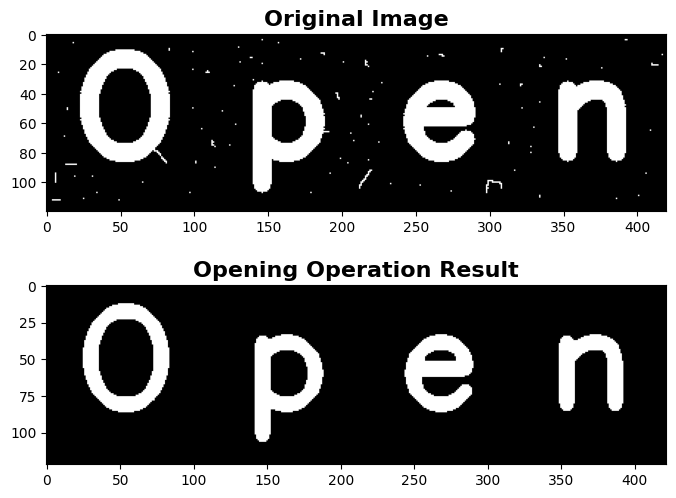

In [4]:
# 3.2 Morphology Opening-------------------------------------------------

class Q32():
    def Morphology_Opening(self):
        print("3.2 Buttom clicked")
        image = cv2.imread('/kaggle/input/dataset-opencvdl-hw2/Dataset_OpenCvDl_Hw2/Dataset_OpenCvDl_Hw2/Q3/opening.png')

        if image is not None:
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            # Binary for 0 and 255
            threshold = 127
            binary_image = (gray_image > threshold).astype(np.uint8) * 255

            # Pad the image with zeros based on the kernel size (K=3)
            kernel_size = 3
            padded_image = np.pad(binary_image, pad_width=kernel_size // 2, mode='constant', constant_values=0)

            # Define a 3x3 all-ones structuring element aka. Convolution kernel
            structuring_element = np.ones((kernel_size, kernel_size), dtype=np.uint8)

            # erosion operation
            eroded_image = np.zeros_like(padded_image)
            for i in range(kernel_size // 2, padded_image.shape[0] - kernel_size // 2):
                for j in range(kernel_size // 2, padded_image.shape[1] - kernel_size // 2):
                    eroded_image[i, j] = np.min(padded_image[i - kernel_size // 2:i + kernel_size // 2 + 1,
                                                            j - kernel_size // 2:j + kernel_size // 2 + 1] * structuring_element)

            # dilation operation
            dilated_image = np.zeros_like(eroded_image)
            for i in range(kernel_size // 2, eroded_image.shape[0] - kernel_size // 2):
                for j in range(kernel_size // 2, eroded_image.shape[1] - kernel_size // 2):
                    dilated_image[i, j] = np.max(eroded_image[i - kernel_size // 2:i + kernel_size // 2 + 1,
                                                             j - kernel_size // 2:j + kernel_size // 2 + 1] * structuring_element)

            plt.figure(figsize=(8, 6))

            plt.subplot(2, 1, 1)
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.title('Original Image',fontsize=16, fontweight="bold")

            plt.subplot(2, 1, 2)
            plt.imshow(cv2.cvtColor(eroded_image, cv2.COLOR_BGR2RGB))
            plt.title('Opening Operation Result',fontsize=16, fontweight="bold")

            plt.show()

        else:
            print("請先選擇圖片")

q32 = Q32()
q32.Morphology_Opening()


### **MNIST（Modified National Institute of Standards and Technology）**

- MNIST 是一個包含 **手寫數字（0~9）影像的資料集**，這些影像來自於美國國家標準技術研究所（NIST）的數據，由 Yann LeCun、Corinna Cortes 和 Christopher Burges 整理並重新處理過，成為「機器學習影像分類」領域中的標準基準資料集。

- **資料內容**

    1. 每張影像表示一個 **手寫數字（0~9）**
    2. 圖像儲存為 **NumPy 陣列或 Tensor**
    3. 標籤為 **對應的數字類別（整數：0~9）**

| 類別 | 數量 | 描述 |
|------|------|------|
| 訓練集（Training set） | 60,000 筆 | 用來訓練模型 |
| 測試集（Test set） | 10,000 筆 | 用來評估模型泛化能力 |
| 圖像大小 | 28 x 28 像素 | 每張圖像是灰階單通道（黑白） |
| 數值範圍 | 0 ~ 255 | 0 是黑色，255 是白色 |

- **MNIST 的用途**

| 用途 | 說明 |
|------|------|
| **影像分類入門** | 練習從圖像中辨識數字 |
| **卷積神經網路（CNN）訓練** | 常用來測試 CNN 架構效果 |
| **比較模型效果** | 各種演算法（SVM、KNN、MLP、CNN）都能應用 |
| **形態學測試** | 可用於實驗腐蝕、膨脹等影像處理技術 |
| **資料增強練習** | 套用旋轉、平移、雜訊等變換測試模型魯棒性 |


- **MNIST 資料特性**
    1. 手寫數字有 **高度變化性**（不同人的筆跡不同）
    2. 資料集是 **乾淨的**，沒有明顯的雜訊或模糊
    3. 各類別（0~9）**相對平衡**，分布均勻
    4. 已經預先對齊與置中，方便模型學習


In [6]:
# 4.1 Show Model Structure-----------------------------------------------

class Q41():
    def Show_Model_Structure(self):
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        model = torchvision.models.vgg19_bn(num_classes = 10)
        model = model.to(device)

        # show model structure
        summary(model, (3,32,32))

q41 = Q41()
q41.Show_Model_Structure()


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4           [-1, 64, 32, 32]          36,928
       BatchNorm2d-5           [-1, 64, 32, 32]             128
              ReLU-6           [-1, 64, 32, 32]               0
         MaxPool2d-7           [-1, 64, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]          73,856
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,584
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
        MaxPool2d-14            [-1, 12

Epoch 1 ------Train Loss: 2.8968 | Train Acc: 23.64%
Epoch 1 --------Val Loss: 2.0155 |   Val Acc: 21.35%
Saved best model at epoch 1  | Val Acc：21.35%
Epoch 5 ------Train Loss: 1.7878 | Train Acc: 29.73%
Epoch 5 --------Val Loss: 1.1849 |   Val Acc: 49.61%
Saved best model at epoch 5  | Val Acc：49.61%
Saved best model at epoch 7  | Val Acc：65.01%
Saved best model at epoch 9  | Val Acc：76.28%
Epoch 10------Train Loss: 0.7623 | Train Acc: 71.28%
Epoch 10--------Val Loss: 0.4093 |   Val Acc: 84.03%
Saved best model at epoch 10 | Val Acc：84.03%
Saved best model at epoch 11 | Val Acc：93.66%
Saved best model at epoch 12 | Val Acc：96.11%
Saved best model at epoch 13 | Val Acc：96.99%
Saved best model at epoch 14 | Val Acc：97.07%
Epoch 15------Train Loss: 0.1521 | Train Acc: 96.33%
Epoch 15--------Val Loss: 0.1270 |   Val Acc: 96.46%
Epoch 20------Train Loss: 0.1964 | Train Acc: 95.56%
Epoch 20--------Val Loss: 1.4638 |   Val Acc: 65.11%
Saved best model at epoch 22 | Val Acc：98.06%
Saved best

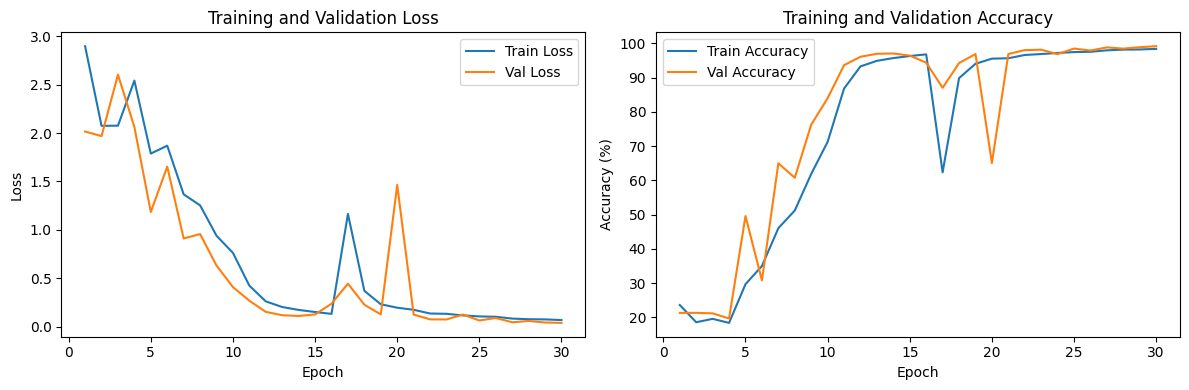

['Best_vgg19_bn_for_MNIST.pth', 'data', 'Vgg19_bn_training_curves.png', '.virtual_documents']


In [6]:
# 4.2 Show Acc and Loss -------------------------------------------------

class Q42():
    def Show_Acc_and_Loss(self, batch_size, epochs, lr):
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

        # 1. Data Preprocessing - 在資料端 revise input from 1 channle -> 3

        # Data augmentation for training set
        train_transform = transforms.Compose([
            transforms.Resize((32, 32)),
            transforms.RandomCrop(32, padding=4), # 最終隨機裁剪後圖像的尺寸為 32x32
            # transforms.RandomAffine(degrees=(-10,10),translate=(0.1, 0.1), scale=(0.9, 1.1)),
            transforms.Grayscale(num_output_channels=3), # gray image convert to 3 channles
            transforms.ToTensor(),
            transforms.Normalize((0.1307, 0.1307, 0.1307), (0.3081, 0.3081, 0.3081))  # 經統計後  MNIST 的均值和標準差
        ])  # Normalize()代表每個灰度圖像從每個像素值中減去 0.1307 (maen)；並將結果除以 0.3081 (std)

        # Data augmentation only normalize for val set
        val_transform = transforms.Compose([
            transforms.Resize((32, 32)),
            transforms.Grayscale(num_output_channels=3), # gray image convert to 3 channles
            transforms.ToTensor(),
            transforms.Normalize((0.1307, 0.1307, 0.1307), (0.3081, 0.3081, 0.3081))
        ])

        '''
        transforms.RandomAffine(translate(0.1, 0.1), scale(0.9, 1.1)) 隨機仿射變換
            1. translate：在水平和垂直方向上進行隨機平移的最大比例 (tx, ty) -> [-2.8, +2.8]
            2. scale：圖像的縮放比例會在 [0.9, 1.1] 的範圍內隨機選擇

        transforms.ColorJitter(brightness=0.2, contrast=0.2) 隨機調整亮度和對比度
            1. brightness：亮度在 [0.8, 1.2] 的範圍內隨機選擇
            2. contrast：對比度在 [0.8, 1.2] 的範圍內隨機選擇

        transforms.Grayscale(num_output_channels=3)
            1. input：接收一個單 channel（灰度）或多 channel 的 image
            2. convert：如果 input 是彩色，它會將其轉換為灰度；如果輸入已經是灰度，會保持不變
            3. num_output_channels=3：從 (Hight, Width) or (1, Hight, Width) -> (3, Hight, Width)
        '''
        data_root = './data'
        train_dataset = torchvision.datasets.MNIST(root=data_root, train=True, download=True, transform=train_transform)
        val_dataset = torchvision.datasets.MNIST(root=data_root, train=False, download=True, transform=val_transform)

        train_loader = DataLoader(
            train_dataset,
            batch_size=batch_size,
            shuffle=True,
            num_workers=2
        )

        val_loader = DataLoader(
            val_dataset,
            batch_size=batch_size,
            shuffle=False,
            num_workers=2
        )
        '''
        DataLoader：
            1. 當資料集總樣本數無法被批次大小整除時，會產生剩餘樣本，DataLoader 預設為捨棄
            2. 標籤資料由 DataLoader 負責轉換為 PyTorch tensor；影像資料則是由 transforms.ToTensor() 轉換
                - DataLoader 會將標籤資料轉換為 PyTorch tensor，以便與影像資料一起傳遞給模型
            3. num_workers 為一個超參數，用於設定資料載入的子程序數量，可以顯著加速資料載入的速度
                - 子程序負責從資料集中讀取資料，並將資料傳遞給主程序（main process）
                - 主程序負責將資料傳遞給模型進行訓練
        '''
        # 2. load VGG19 model with BatchNorm
        model = vgg19_bn(pretrained=False, num_classes=10)
        model = model.to(device)

        # 3. define Loss function and optimizer
        loss_fn = nn.CrossEntropyLoss() # nn.CrossEntropyLoss() = nn.LogSoftmax() + nn.NLLLoss()
        optimizer = optim.Adam(model.parameters(), lr=lr)

        # record training、val loss and acc
        train_losses, val_losses = [], []
        train_accuracies, val_accuracies = [], []
        best_val_acc = 0.0  # for best val acc model

        # 4. define train and val
        def train(epoch):
            model.train()
            running_loss = 0.0
            correct = 0
            total = 0

            for i, (X, y) in enumerate(train_loader):
                X, y = X.to(device), y.to(device)
                '''
                每個 train_loader 中輸出一個 tuple：
                    1. X(inputs)：一個 shape 為 (batch_size, channels, height, width) 的 tensor
                    2. y(lables)：一個 shape 為 (batch_size) 的 tensor，因為每一筆影像配對一個 label，有幾筆 image = 有幾筆 label
                '''

                # .zero_grad() 將模型所有參數的梯度清零。
                # 是必要的，因為 PyTorch 的梯度會累加，如果不清零，前一批次的梯度會影響當前批次。
                optimizer.zero_grad()

                # Forward Propagation： X (batch_size, channels, height, width) -> y_pred (batch_size, num_classes)
                y_pred = model(X)
                loss = loss_fn(y_pred, y)

                # Backward Propagation
                loss.backward() # 梯度會儲存在模型參數的 .grad 屬性中，為後續優化步驟做準備
                optimizer.step()
                '''
                optimizer.step()
                    1. 根據計算出的梯度，使用 Optimizer 更新模型參數
                    2. 對於 SGD，更新規則是：param = param − lr × grad
                '''
                running_loss += loss.item() # 累積整個 epoch 的 loss
                _, predicted = torch.max(y_pred, 1)
                '''
                torch.max() 會回傳兩個 tensor：
                    1. 第一個 tensor 包含每個 sample 的最大「值」
                    2. 第二個 tensor 包含每個 sample 最大值的「索引」，也就是預測的「類別」

                舉例：
                outputs = torch.tensor([[0.1, 0.9, 0.2], 表示 batch_size = 3, num_classes = 3
                                        [0.8, 0.1, 0.3],
                                        [0.2, 0.3, 0.5]])

                _, predicted = torch.max(outputs, 1) 會輸出 [1, 0, 2]，shape 由 batch_size 決定
                '''
                total += y.size(0) # .size = .shape 回傳 batch_size；total 代表實際有經過 train 的 sample數
                correct += (predicted == y).sum().item() # .item() 用於從單一元素的 tensor 中取得 Python 數值，多元素會 error

            # calculate acc
            epoch_loss = running_loss / len(train_loader)
            epoch_acc = 100. * correct / total
            train_losses.append(epoch_loss)
            train_accuracies.append(epoch_acc)
            if epoch == 0:
                print(f"Epoch {epoch+1:<2}------Train Loss: {epoch_loss:<.4f} | Train Acc: {epoch_acc:<.2f}%")
            elif (epoch+1) % 5 == 0:
                print(f"Epoch {epoch+1:<2}------Train Loss: {epoch_loss:<.4f} | Train Acc: {epoch_acc:<.2f}%")

        def validate(epoch):
            model.eval()
            '''
            model.train() 訓練模式時，某些層（如 BatchNorm 和 Dropout）會啟用特定行為：
                - BatchNorm 會更新 mean 和 std 的運行統計。
                - Dropout 會隨機丟棄部分神經元以防止 overfitting。

            model.eval()  評估模式時，確保驗證過程一致，不受隨機性影響
                - BatchNorm 層使用訓練時記錄的運行 mean 和 std，而不是當前批次的統計值。
                - Dropout 層被禁用（即不隨機丟棄神經元）。
            '''
            running_loss = 0.0
            correct = 0
            total = 0
            with torch.no_grad(): # 關閉梯度計算，驗證階段不需要更新模型參數，同時能減少 memory 使用並加速計算
                for X, y in val_loader:
                    X, y = X.to(device), y.to(device)

                    # Forward Propagation： X (batch_size, channels, height, width) -> y_pred (batch_size, num_classes)
                    y_pred = model(X)
                    loss = loss_fn(y_pred, y) # 注意：這裡計算 loss 僅用於評估，不會用於反向傳播

                    running_loss += loss.item()
                    _, predicted = torch.max(y_pred, 1)
                    total += y.size(0)
                    correct += (predicted == y).sum().item()

            epoch_loss = running_loss / len(val_loader)
            epoch_acc = 100. * correct / total
            val_losses.append(epoch_loss)
            val_accuracies.append(epoch_acc)
            if epoch == 0:
                print(f"Epoch {epoch+1:<2}--------Val Loss: {epoch_loss:<.4f} |   Val Acc: {epoch_acc:<.2f}%")
            elif (epoch+1) % 5 == 0:
                print(f"Epoch {epoch+1:<2}--------Val Loss: {epoch_loss:<.4f} |   Val Acc: {epoch_acc:<.2f}%")

            # save the bset model
            nonlocal best_val_acc # 使用 nonlocal 允許函數「修改」外部定義的 best_val_acc
            if epoch_acc > best_val_acc:
                best_val_acc = epoch_acc
                torch.save(model.state_dict(), 'Best_vgg19_bn_for_MNIST.pth')
                '''
                torch.save()：保存 model 的參數（state_dict）到 best_vgg19_bn.pth
                state_dict 是一個字典，包含模型的所有參數（weights、bias）
                '''
                print(f"Saved best model at epoch {epoch+1:<2} | Val Acc：{best_val_acc:.2f}%")

        # 5. trainng
        for epoch in range(epochs):
            train(epoch)
            validate(epoch)

        # 6. display loss / acc curve
        plt.figure(figsize=(12, 4))

        # loss
        plt.subplot(1, 2, 1)
        plt.plot(range(1, epochs + 1), train_losses, label='Train Loss')
        plt.plot(range(1, epochs + 1), val_losses, label='Val Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Training and Validation Loss')
        plt.legend()

        # acc
        plt.subplot(1, 2, 2)
        plt.plot(range(1, epochs + 1), train_accuracies, label='Train Accuracy')
        plt.plot(range(1, epochs + 1), val_accuracies, label='Val Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy (%)')
        plt.title('Training and Validation Accuracy')
        plt.legend()

        # save
        plt.tight_layout()
        plt.savefig('Vgg19_bn_training_curves.png')
        plt.show()

q42 = Q42()
q42.Show_Acc_and_Loss(128, 30, 0.001)
print(os.listdir("/kaggle/working/"))


In [ ]:
# 4.3 Show Predicted Distribution and Class Label------------------------

class PaintWidget(QWidget):
    def __init__(self):
        super().__init__()
        self.setFixedSize(280, 280)
        self.image = QImage(self.size(), QImage.Format_RGB32)
        self.image.fill(Qt.black)
        self.drawing = False
        self.last_point = QPoint()

    def paintEvent(self, event):
        canvas_painter = QPainter(self)
        canvas_painter.drawImage(self.rect(), self.image, self.image.rect())

    def mousePressEvent(self, event):
        if event.button() == Qt.LeftButton:
            self.drawing = True
            self.last_point = event.pos()

    def mouseMoveEvent(self, event):
        if self.drawing:
            painter = QPainter(self.image)
            pen = QPen(Qt.white, 15, Qt.SolidLine, Qt.RoundCap, Qt.RoundJoin)
            painter.setPen(pen)
            painter.drawLine(self.last_point, event.pos())
            self.last_point = event.pos()
            self.update()

    def mouseReleaseEvent(self, event):
        if event.button() == Qt.LeftButton:
            self.drawing = False

    def clear(self):
        self.image.fill(Qt.black)
        self.update()

    def get_image_tensor(self):
        ptr = self.image.bits()
        ptr.setsize(self.image.byteCount())
        arr = np.array(ptr).reshape(self.image.height(), self.image.width(), 4)
        arr_rgb = arr[:, :, :3]
        pil_img = transforms.ToPILImage()(arr_rgb.transpose((2, 0, 1)).astype(np.uint8))
        return transform(pil_img).unsqueeze(0)

class MainWindow(QWidget):
    def __init__(self):
        super().__init__()
        self.setWindowTitle("MNIST 手寫數字塗鴉板")
        self.canvas = PaintWidget()
        self.predict_btn = QPushButton("預測數字")
        self.clear_btn = QPushButton("清除畫布")
        self.result_label = QLabel("預測結果：")
        self.result_label.setStyleSheet("font-size: 18px;")

        self.predict_btn.clicked.connect(self.predict_digit)
        self.clear_btn.clicked.connect(self.canvas.clear)

        layout = QVBoxLayout()
        layout.addWidget(self.canvas)
        layout.addWidget(self.predict_btn)
        layout.addWidget(self.clear_btn)
        layout.addWidget(self.result_label)
        self.setLayout(layout)

    def predict_digit(self):
        img_tensor = self.canvas.get_image_tensor()
        with torch.no_grad():
            outputs = model(img_tensor)
            probs = F.softmax(outputs, dim=1).squeeze().numpy()
            pred = int(np.argmax(probs))
            self.result_label.setText(f"預測結果：{pred}")

            # 顯示機率分布圖
            self.show_distribution(probs)

    def show_distribution(self, probs):
        plt.figure(figsize=(6, 3))
        plt.bar(np.arange(10), probs, color='skyblue')
        plt.title("機率分布")
        plt.xlabel("數字")
        plt.ylabel("機率")
        plt.xticks(np.arange(10))
        plt.ylim([0, 1])
        plt.tight_layout()
        plt.show()

if __name__ == "__main__":
    app = QApplication(sys.argv)
    window = MainWindow()
    window.show()
    sys.exit(app.exec_())

class Q43()
    def Show_Predicted_Distribution_and_Class_Label(self):
        from PyQt5.QtWidgets import QApplication, QWidget, QPushButton, QVBoxLayout, QLabel
        from PyQt5.QtGui import QPainter, QImage, QPen, QPixmap
        from PyQt5.QtCore import Qt, QPoint

        # ------- Modify this: Load your own trained model --------
        model = torch.load("/kaggle/working/Best_vgg19_bn_for_MNIST.pth", map_location=torch.device('cpu'))
        model.eval()

        # --- Preprocessing same as your val_transform ---
        transform = transforms.Compose([
            transforms.Resize((32, 32)),
            transforms.Grayscale(num_output_channels=3),
            transforms.ToTensor(),
            transforms.Normalize((0.1307, 0.1307, 0.1307), (0.3081, 0.3081, 0.3081))
        ])

q43 = Q43()
q43.Show_Predicted_Distribution_and_Class_Label()


### **ResNet（Residual Network）**

- **ResNet** 是由微軟研究院於 2015 年提出的一種深度卷積神經網路架構，它**解決了深層網路在訓練時的「梯度消失」與「準確率下降」問題**，使網路可以非常深而不會失效。 

- **核心概念：Residual Learning（殘差學習）**：ResNet 的重點是使用 **「殘差連接（Skip Connection）」** 來讓深層網路更容易訓練。

- **Bottleneck Block 結構（核心 module）**，這個結構讓深層網路在計算成本可控的情況下增加深度，且透過 **skip connection** 把輸入直接加到輸出來形成「殘差」，Skip Connection：`output = F(x) + x`，**讓模型學「差值」而非完整映射**。每個 Block 各包含：

```
1x1 conv (降低維度)
3x3 conv (標準卷積)
1x1 conv (恢復維度)
+ identity skip connection
```

- ResNet50 表示這個網路有 **50 層深**，其中大部分是**卷積層（Conv）**。
    - **1（conv1） + 16 x 3（conv layers per block） + 1（fc）= 50 層**
    - 1 個 Conv1
    - 16 個 Bottleneck blocks（每個 block 有 3 層 conv）
    - 1 個 FC 層

| 區塊 | 功能說明 |
|------|----------|
| Conv1 | 一個 7x7 的卷積 + MaxPooling |
| Conv2_x | 3 個 Bottleneck block，channdel 從 64 開始 |
| Conv3_x | 4 個 Bottleneck block |
| Conv4_x | 6 個 Bottleneck block |
| Conv5_x | 3 個 Bottleneck block |
| AvgPool | Global Average Pooling |
| FC | 全連接層（預設輸出 1000 類別）|

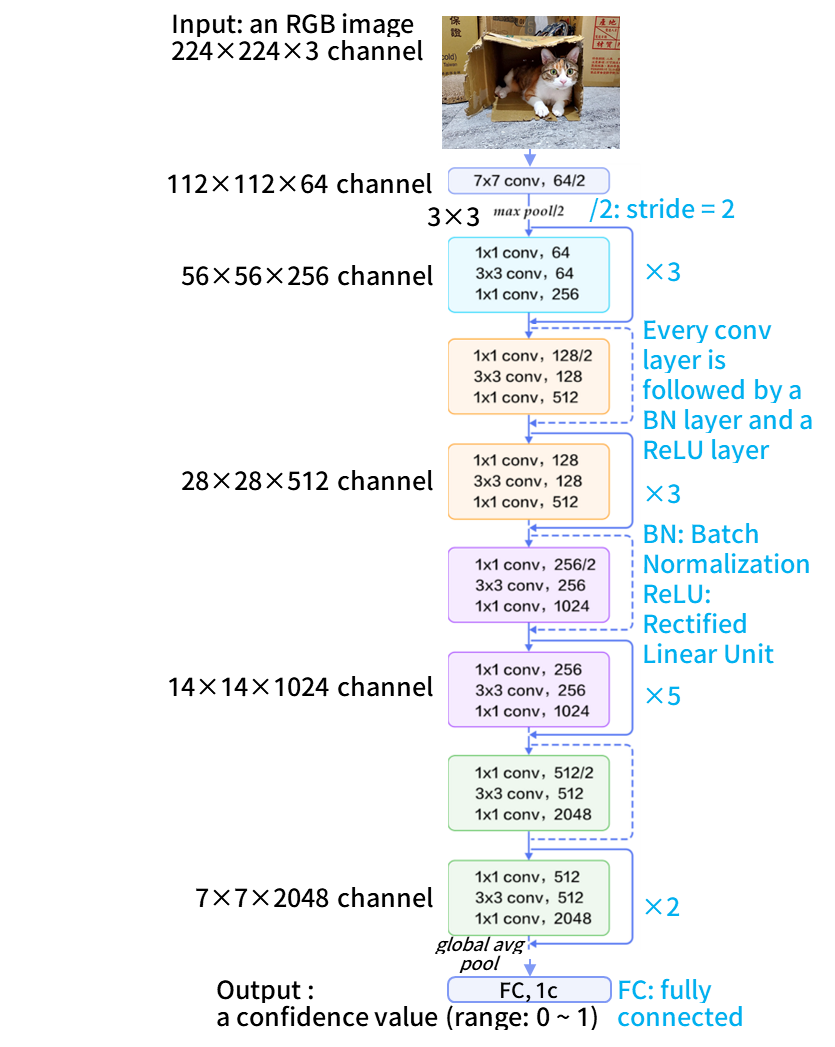

- **ResNet50 的優點**：

| 優點 | 說明 |
|------|------|
| ✔️ 深度可擴展 | 可達 50、101、152 層 |
| ✔️ 殘差學習 | 解決深層訓練困難 |
| ✔️ 效果強 | 在 ImageNet 上表現出色 |
| ✔️ 支援預訓練 | torchvision 可直接載入預訓練權重 |

- **應用**：

    1. 影像分類（Image Classification）
    2. 物件偵測（搭配 Faster R-CNN）
    3. 影像語意分割（Semantic Segmentation）
    4. 特徵提取 backbone
    5. Medical imaging, 衛星影像、手寫辨識


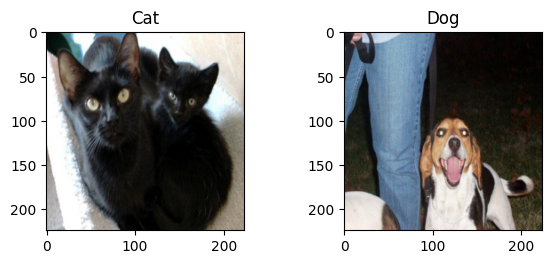

In [14]:
# 5.1 Load the dataset and resize images---------------------------------

class Q51():
    def Load_the_dataset_and_resize_images(self):
        data_root = '/kaggle/input/hw2-q5-inference-dataset/Hw2_Q5_inference_dataset/'

        transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
        ])

        # random.choice()
        cat_folder = os.path.join(data_root, "Cat")
        dog_folder = os.path.join(data_root, "Dog")

        cat_image_path = os.path.join(cat_folder, random.choice(os.listdir(cat_folder)))
        dog_image_path = os.path.join(dog_folder, random.choice(os.listdir(dog_folder)))

        cat_image = PILImage.open(cat_image_path).convert("RGB")
        dog_image = PILImage.open(dog_image_path).convert("RGB")

        cat_image = transform(cat_image)
        dog_image = transform(dog_image)

        plt.subplot(1, 2, 1)
        plt.imshow(cat_image.permute(1, 2, 0).numpy())
        plt.title("Cat")

        plt.subplot(1, 2, 2)
        plt.imshow(dog_image.permute(1, 2, 0).numpy())
        plt.title("Dog")
        '''
        permute(1, 2, 0) 用於重新排列 Tensor 的維度
        PyTorch Tensor 順序為 (Channel, Hight, Width)
        matplotlib 的 imshow() 順序為 (Hight, Width, Channel)
        '''
        # adjust (width)horizontal space
        plt.subplots_adjust(wspace=0.5)
        plt.show()

q51 = Q51()
q51.Load_the_dataset_and_resize_images()


In [17]:
# 5.2 Show the structure of ResNet50 model-------------------------------

class Q52():
    def Show_the_structure_of_ResNet50_model(self):
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        model = resnet50(pretrained=False)

        # original output layer
        print("Original output layer:", model.fc)

        # Replace the output layer -> Linear(2048 → 1) + Sigmoid
        model.fc = nn.Sequential(
            nn.Linear(2048, 1),
            nn.Sigmoid()
        )

        print("Replaced output layer:", model.fc)

        model = model.to(device)
        # Display the modified ResNet50 architecture
        summary(model, (3, 224, 224))  # Assuming input images are RGB with size 224x224

q52 = Q52()
q52.Show_the_structure_of_ResNet50_model()


Original output layer: Linear(in_features=2048, out_features=1000, bias=True)
Replaced output layer: Sequential(
  (0): Linear(in_features=2048, out_features=1, bias=True)
  (1): Sigmoid()
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 

### **各種 Loss Function 對輸入/標籤形狀的要求**

| Loss Function | 用途 | 預測值 `y_pred` 的 shape | 標籤 `y` 的 shape | 備註 |
|---------------|------|---------------------------|-------------------|-------|
| **Binary Cross-Entropy Loss**： `nn.BCELoss()` | **輸出經手動應用 Sigmoid：二元分類** | `(batch_size, 1)`（機率） | `(batch_size, 1)`（0 or 1） | **預測值和目標值的 shape 必須相同**：`y` 需先 `.float().unsqueeze(1)`|
| **Binary Cross-Entropy with Logits Loss**：`nn.BCEWithLogitsLoss()` | **內建 sigmoid 函數：二元分類**（輸出 raw logits） | `(batch_size, 1)`（raw logits） | `(batch_size, 1)`（0 or 1） | 不需手動加 Sigmoid |
| `nn.CrossEntropyLoss()` | **多類別分類** | `(batch_size, num_classes)`（raw logits） | `(batch_size)`（每個值是 class index） | 已內建，不用加 Softmax，loss 會自動處理 |
| **Negative Log Likelihood Loss**：`nn.NLLLoss()` | 多類別分類（輸出已經是 log-softmax） | `(batch_size, num_classes)`（log probs） | `(batch_size)`（class index） | 是 nn.CrossEntropyLoss 的一部分，用於 log-softmax 輸出模型 |

1. **BCELoss / BCEWithLogitsLoss** → 輸入維度 `y` 需要是 `(batch_size, 1)`，而不是`(batch_size)`
    - 常見做法 for BCELoss/BCEWithLogitsLoss，保證 y 是 float 並 shape 對齊：**y = y.to(device).float().unsqueeze(1)**
 
2. **CrossEntropyLoss** → 輸入維度 `y` 要是 `(batch_size)`（一維），值是 class 的 index（例如 0, 1, 2...）
    - CrossEntropyLoss 不用做 unsqueeze，也不用轉 float，labels 是 class index, e.g. 0 or 1 or 2
y = y.to(device).long()

### **Logits 與機率**

| 特性         | Logits                | 機率 (Probability)      |
|--------------|-----------------------|-------------------------|
| 範圍         | 任意實數 (-∞, +∞)     | [0, 1]                 |
| 規範化       | 未規範化              | 規範化（多分類和為 1） |
| 計算方式     | 線性層輸出            | sigmoid 或 softmax 輸出 |
| 數值穩定性   | 可能很大或很小        | 穩定在 0 到 1 之間     |

- 假設一個二分類模型的輸出 logits 是：
    - \( z = 2.0 \)（正類的信心分數）
    - 通過 sigmoid 轉換後：p =  0.88，表示模型預測正類的機率為 88%。

- 假設一個三分類模型的輸出 logits 是：
    - \( z = [1.0, 2.0, 0.5] \)
    - 通過 softmax 轉換後：
        - p_0 = 0.23
        - p_1 = 0.63
        - p_2 = 0.14
    - 表示模型預測三個類別的概率分別為 23%、63% 和 14%。


- **為什麼損失函數偏好 Logits？**

1. **數值穩定性**：
   - 使用 logits，損失函數內部可以通過數學變換（如：log-sum-exp）避免這些問題。

2. **計算效率**：
   - 將激活函數和損失計算合併，可以減少中間步驟，提高計算效率。

3. **梯度計算**：
   - Logits 的梯度計算更直接，適合反向傳播。


/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Epoch 1 ------Train Loss: 0.6342 | Train Acc: 67.95%
Epoch 1 --------Val Loss: 0.5835 |   Val Acc: 68.06%
Saved best model at epoch 1  | Val Acc：68.06%


/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Saved best model at epoch 2  | Val Acc：73.44%


/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))
/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Saved best model at epoch 4  | Val Acc：79.17%


/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Epoch 5 ------Train Loss: 0.4173 | Train Acc: 81.04%
Epoch 5 --------Val Loss: 0.5575 |   Val Acc: 76.06%


/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))
/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Saved best model at epoch 7  | Val Acc：80.83%


/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))
/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))
/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Epoch 10------Train Loss: 0.2699 | Train Acc: 89.12%
Epoch 10--------Val Loss: 0.2459 |   Val Acc: 90.83%
Saved best model at epoch 10 | Val Acc：90.83%


/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Saved best model at epoch 11 | Val Acc：93.28%


/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Saved best model at epoch 12 | Val Acc：93.61%


/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Saved best model at epoch 13 | Val Acc：93.83%


/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))
/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Epoch 15------Train Loss: 0.1418 | Train Acc: 94.28%
Epoch 15--------Val Loss: 0.1431 |   Val Acc: 94.67%
Saved best model at epoch 15 | Val Acc：94.67%


/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))
/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Saved best model at epoch 17 | Val Acc：94.72%


/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))
/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))
/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Epoch 20------Train Loss: 0.1073 | Train Acc: 95.55%
Epoch 20--------Val Loss: 0.1728 |   Val Acc: 93.39%


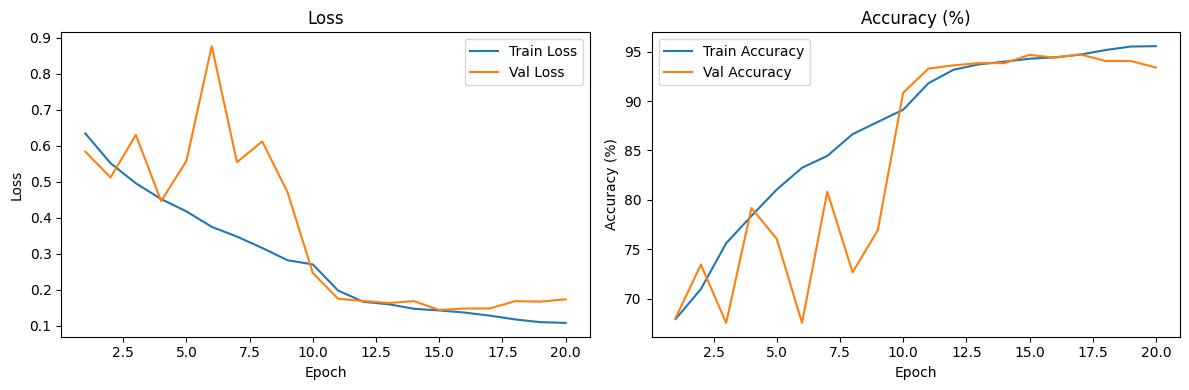

['Best_ResNet50_without_Random_Erasing.pth', 'Best_ResNet50_with_Random_Erasing.pth', '.virtual_documents', 'ResNet50_training_curves_with_Random_Erasing.png']


In [8]:
# 5.3 Compare the accuracies of 2 ResNet50 models on validation dataset----------------------

# 5.3-1 With Random-Erasing-------------------------------

class Q53_1():
    def ResNet50_With_Random_Erasing(self, batch_size, epochs, lr):
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

        # 1. Data Preprocessing

        # Data augmentation for training set
        train_transform = transforms.Compose([
            transforms.Resize(224),
            transforms.CenterCrop(224),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.RandomErasing(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])

        # Data augmentation only normalize for val set
        val_transform = transforms.Compose([
            transforms.Resize(224),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])

        '''
        transforms.CenterCrop() 從圖像的中心位置裁剪出指定大小的區域
            - 中心裁剪可以作為調整圖像尺寸的一部分

        transforms.RandomErasing() 隨機擦除圖像部分區域的資料增強
            - 需要在 Tensor 格式的圖像數據上進行操作，放在 ToTensor()後面
            - 以一定的機率隨機選擇圖像中的一個矩形區域，並用指定的值填充該區域的像素
        '''
        # 自定義一個圖像讀取方式 loader，強制只用 JPEG pil_loader 讀圖（跳過 PIL 自動推斷）
        def pil_loader(path):
            with open(path, 'rb') as f:
                img = PILImage.open(io.BytesIO(f.read()))
                return img.convert('RGB')  # 強制轉 RGB（避免 tiff 等特殊通道）

        # load dataset on kaggle
        data_root = '/kaggle/input/dataset-opencvdl-hw2-q5/Dataset_OpenCvDl_Hw2_Q5/dataset/'
        train_dir = os.path.join(data_root, "training_dataset")
        val_dir = os.path.join(data_root, "validation_dataset")

        train_dataset = datasets.ImageFolder(root=train_dir, transform=train_transform, loader=pil_loader)
        val_dataset = datasets.ImageFolder(root=val_dir, transform=val_transform, loader=pil_loader)
        '''
        torchvision.datasets.ImageFolder 要求資料集的目錄結構長這樣：

        root/
        ├── class1/
        │   ├── img1.jpg
        │   ├── img2.jpg
        │   └── ...
        ├── class2/
        │   ├── img1.jpg
        │   ├── img2.jpg
        │   └── ...
        └── ...

        - 適用於「每個類別都有獨立資料夾」、「想快速建構二分類 / 多分類資料集」

        ImageFolder 本質上是一個自動建構標籤的 Dataset 類別，它會：
            1. 掃描 root 目錄
            2. 每個子資料夾名稱代表一個 class
            3. 給每個 class 配一個整數 label
            4. 回傳 (__getitem__) -> (image_tensor, label_int)

        '''
        train_loader = DataLoader(
            train_dataset,
            batch_size=batch_size,
            shuffle=True,
            num_workers = 4,
            pin_memory=True
        )

        val_loader = DataLoader(
            val_dataset,
            batch_size=batch_size,
            shuffle=False,
            num_workers = 4,
            pin_memory=True
        )
        '''
        pin_memory=True 讓 CPU 至 GPU 的 tensor 傳輸變快，減少 bottleneck
        '''

        '''
        DataLoader：
            1. 當資料集總樣本數無法被批次大小整除時，會產生剩餘樣本，DataLoader 預設為捨棄
            2. 標籤資料由 DataLoader 負責轉換為 PyTorch tensor；影像資料則是由 transforms.ToTensor() 轉換
                - DataLoader 會將標籤資料轉換為 PyTorch tensor，以便與影像資料一起傳遞給模型
            3. num_workers 為一個超參數，用於設定資料載入的子程序數量，可以顯著加速資料載入的速度
                - 子程序負責從資料集中讀取資料，並將資料傳遞給主程序（main process）
                - 主程序負責將資料傳遞給模型進行訓練
        '''
        # 2. load Resnet50 with output = FC + sigmoid
        model = resnet50(weights=None)

        model.fc = nn.Sequential(
            nn.Linear(2048, 1),
            nn.Sigmoid()
        )

        model = model.to(device)

        # 3. define Loss function and optimizer
        loss_fn = nn.BCELoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)
        scheduler = StepLR(optimizer, step_size=10, gamma=0.1)  # 經過每 10 個 epoch，lr 變為原來的 0.1 倍

        # record training、val loss and acc
        train_losses, val_losses = [], []
        train_accuracies, val_accuracies = [], []
        best_val_acc = 0.0  # for best val acc model

        # 4. define train and val
        def train(epoch):
            model.train()
            running_loss = 0.0
            correct = 0
            total = 0

            for i, (X, y) in enumerate(train_loader):
                X, y = X.to(device, non_blocking=True), y.to(device, non_blocking=True).float().unsqueeze(1)
                '''
                .to(device, non_blocking=True) 搭配 pin_memory=True -> 達到更高效的資料搬運
                '''

                '''
                .float().unsqueeze(1) for 二元分類（輸出經過 Sigmoid）adjust shape to (batch_size, 1)
                '''

                '''
                每個 train_loader 中輸出一個 tuple：
                    1. X：一個 shape 為 (batch_size, channels, height, width) 的 tensor
                    2. y：一個 shape 為 (batch_size) 的 tensor，因為每一筆影像配對一個 label，有幾筆 image = 有幾筆 label
                '''

                # .zero_grad() 將模型所有參數的梯度清零。
                # 是必要的，因為 PyTorch 的梯度會累加，如果不清零，前一批次的梯度會影響當前批次。
                optimizer.zero_grad()

                # Forward Propagation： X (batch_size, channels, height, width) -> y_pred (batch_size, 1)
                y_pred = model(X)
                loss = loss_fn(y_pred, y)

                # Backward Propagation
                loss.backward() # 梯度會儲存在模型參數的 .grad 屬性中，為後續優化步驟做準備
                optimizer.step()
                '''
                optimizer.step()
                    1. 根據計算出的梯度，使用 Optimizer 更新模型參數
                    2. 對於 SGD，更新規則是：param = param − lr × grad
                '''
                predicted = (y_pred > 0.5).int()
                running_loss += loss.item() # 累積整個 epoch 的 loss

                total += y.size(0) # .size = .shape 回傳 batch_size；total 代表實際有經過 train 的 sample數
                correct += (predicted == y).sum().item() # .item() 用於從單一元素的 tensor 中取得 Python 數值，多元素會 error

            # calculate acc
            epoch_loss = running_loss / len(train_loader)
            epoch_acc = 100. * correct / total
            train_losses.append(epoch_loss)
            train_accuracies.append(epoch_acc)
            if epoch == 0:
                print(f"Epoch {epoch+1:<2}------Train Loss: {epoch_loss:<.4f} | Train Acc: {epoch_acc:<.2f}%")
            elif (epoch+1) % 5 == 0:
                print(f"Epoch {epoch+1:<2}------Train Loss: {epoch_loss:<.4f} | Train Acc: {epoch_acc:<.2f}%")

        def validate(epoch):
            model.eval()
            '''
            model.train() 訓練模式時，某些層（如 BatchNorm 和 Dropout）會啟用特定行為：
                - BatchNorm 會更新 mean 和 std 的運行統計。
                - Dropout 會隨機丟棄部分神經元以防止 overfitting。

            model.eval()  評估模式時，確保驗證過程一致，不受隨機性影響
                - BatchNorm 層使用訓練時記錄的運行 mean 和 std，而不是當前批次的統計值。
                - Dropout 層被禁用（即不隨機丟棄神經元）。
            '''
            running_loss = 0.0
            correct = 0
            total = 0
            with torch.no_grad(): # 關閉梯度計算，驗證階段不需要更新模型參數，同時能減少 memory 使用並加速計算
                for X, y in val_loader:
                    X, y = X.to(device), y.to(device).float().unsqueeze(1)

                    # Forward Propagation： inputs (batch_size, 1) -> outputs (batch_size, prob)
                    y_pred = model(X)

                    loss = loss_fn(y_pred, y) # 注意：這裡計算 loss 僅用於評估，不會用於反向傳播

                    predicted = (y_pred > 0.5).int()
                    running_loss += loss.item()
                    total += y.size(0)
                    correct += (predicted == y).sum().item()

            epoch_loss = running_loss / len(val_loader)
            epoch_acc = 100. * correct / total
            val_losses.append(epoch_loss)
            val_accuracies.append(epoch_acc)
            if epoch == 0:
                print(f"Epoch {epoch+1:<2}--------Val Loss: {epoch_loss:<.4f} |   Val Acc: {epoch_acc:<.2f}%")
            elif (epoch+1) % 5 == 0:
                print(f"Epoch {epoch+1:<2}--------Val Loss: {epoch_loss:<.4f} |   Val Acc: {epoch_acc:<.2f}%")

            # save the bset model
            nonlocal best_val_acc # 使用 nonlocal，允許函數「修改」外部定義的 best_val_acc
            if epoch_acc > best_val_acc:
                best_val_acc = epoch_acc
                torch.save(model.state_dict(), 'Best_ResNet50_with_Random_Erasing.pth')
                '''
                torch.save()：保存 model 的參數（state_dict）到 Best_ResNet50.pth
                state_dict 是一個字典，包含模型的所有參數（weights、bias）
                '''
                print(f"Saved best model at epoch {epoch+1:<2} | Val Acc：{best_val_acc:.2f}%")

        # 5. trainng
        for epoch in range(epochs):
            train(epoch)
            validate(epoch)
            scheduler.step()

        # 6. display loss / acc curve
        plt.figure(figsize=(12, 4))

        # loss
        plt.subplot(1, 2, 1)
        plt.plot(range(1, epochs + 1), train_losses, label='Train Loss')
        plt.plot(range(1, epochs + 1), val_losses, label='Val Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Loss')
        plt.legend()

        # acc
        plt.subplot(1, 2, 2)
        plt.plot(range(1, epochs + 1), train_accuracies, label='Train Accuracy')
        plt.plot(range(1, epochs + 1), val_accuracies, label='Val Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy (%)')
        plt.title('Accuracy (%)')
        plt.legend()

        # save
        plt.tight_layout()
        plt.savefig('ResNet50_training_curves_with_Random_Erasing.png')
        plt.show()

q53_1 = Q53_1()
q53_1.ResNet50_With_Random_Erasing(128, 20, 0.001)
print(os.listdir("/kaggle/working/"))


/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Epoch 1 ------Train Loss: 0.8093 | Train Acc: 66.54%
Epoch 1 --------Val Loss: 0.5657 |   Val Acc: 69.94%
Saved best model at epoch 1  | Val Acc：69.94%


/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Saved best model at epoch 2  | Val Acc：71.33%


/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Saved best model at epoch 3  | Val Acc：74.22%


/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Saved best model at epoch 4  | Val Acc：80.89%


/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Epoch 5 ------Train Loss: 0.4011 | Train Acc: 81.88%
Epoch 5 --------Val Loss: 0.4408 |   Val Acc: 80.11%


/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Saved best model at epoch 6  | Val Acc：84.56%


/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Saved best model at epoch 7  | Val Acc：85.22%


/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Saved best model at epoch 8  | Val Acc：86.50%


/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Saved best model at epoch 9  | Val Acc：90.33%


/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Epoch 10------Train Loss: 0.2016 | Train Acc: 91.81%
Epoch 10--------Val Loss: 0.2414 |   Val Acc: 90.39%
Saved best model at epoch 10 | Val Acc：90.39%


/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Saved best model at epoch 11 | Val Acc：94.61%


/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Saved best model at epoch 12 | Val Acc：95.00%


/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))
/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))
/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Epoch 15------Train Loss: 0.0754 | Train Acc: 97.14%
Epoch 15--------Val Loss: 0.1329 |   Val Acc: 94.89%


/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))
/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Saved best model at epoch 17 | Val Acc：95.06%


/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))
/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))
/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Epoch 20------Train Loss: 0.0407 | Train Acc: 98.54%
Epoch 20--------Val Loss: 0.1639 |   Val Acc: 95.33%
Saved best model at epoch 20 | Val Acc：95.33%


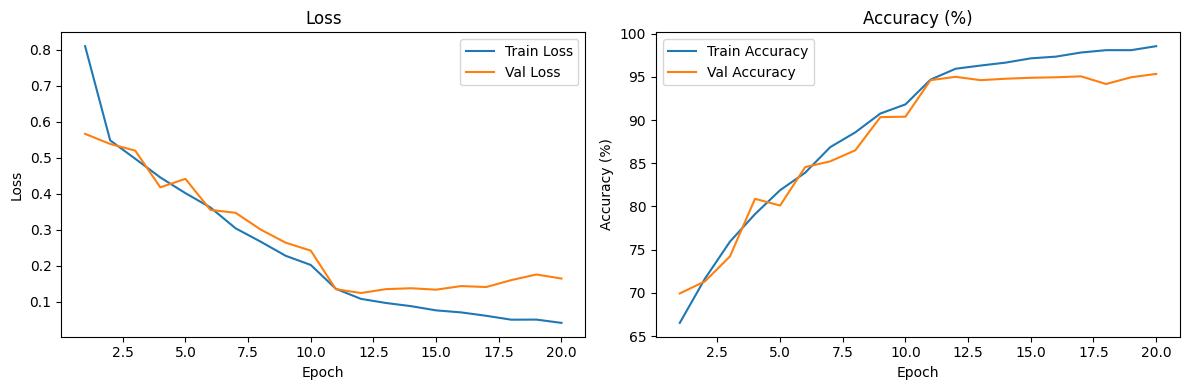

['Best_ResNet50_without_Random_Erasing.pth', 'Best_ResNet50_with_Random_Erasing.pth', '.virtual_documents', 'ResNet50_training_curves_with_Random_Erasing.png', 'ResNet50_training_curves_without_Random_Erasing.png']


In [9]:
# 5.3 Compare the accuracies of 2 ResNet50 models on validation dataset----------------------

# 5.3-2 Without Random-Erasing-------------------------------

class Q53_2():
    def ResNet50_Without_Random_Erasing(self, batch_size, epochs, lr):
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

        # 1. Data Preprocessing

        # Data augmentation for training set
        train_transform = transforms.Compose([
            transforms.Resize(224),
            transforms.CenterCrop(224),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])

        # Data augmentation only normalize for val set
        val_transform = transforms.Compose([
            transforms.Resize(224),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])

        '''
        transforms.CenterCrop() 從圖像的中心位置裁剪出指定大小的區域
            - 中心裁剪可以作為調整圖像尺寸的一部分

        transforms.RandomErasing() 隨機擦除圖像部分區域的資料增強
            - 需要在 Tensor 格式的圖像數據上進行操作，放在 ToTensor()後面
            - 以一定的機率隨機選擇圖像中的一個矩形區域，並用指定的值填充該區域的像素
        '''
        # 自定義一個圖像讀取方式 loader，強制只用 JPEG pil_loader 讀圖（跳過 PIL 自動推斷）
        def pil_loader(path):
            with open(path, 'rb') as f:
                img = PILImage.open(io.BytesIO(f.read()))
                return img.convert('RGB')  # 強制轉 RGB（避免 tiff 等特殊通道）

        # load dataset on kaggle
        data_root = '/kaggle/input/dataset-opencvdl-hw2-q5/Dataset_OpenCvDl_Hw2_Q5/dataset/'
        train_dir = os.path.join(data_root, "training_dataset")
        val_dir = os.path.join(data_root, "validation_dataset")

        train_dataset = datasets.ImageFolder(root=train_dir, transform=train_transform, loader=pil_loader)
        val_dataset = datasets.ImageFolder(root=val_dir, transform=val_transform, loader=pil_loader)
        '''
        torchvision.datasets.ImageFolder 要求資料集的目錄結構長這樣：

        root/
        ├── class1/
        │   ├── img1.jpg
        │   ├── img2.jpg
        │   └── ...
        ├── class2/
        │   ├── img1.jpg
        │   ├── img2.jpg
        │   └── ...
        └── ...

        - 適用於「每個類別都有獨立資料夾」、「想快速建構二分類 / 多分類資料集」

        ImageFolder 本質上是一個自動建構標籤的 Dataset 類別，它會：
            1. 掃描 root 目錄
            2. 每個子資料夾名稱代表一個 class
            3. 給每個 class 配一個整數 label
            4. 回傳 (__getitem__) -> (image_tensor, label_int)

        '''
        train_loader = DataLoader(
            train_dataset,
            batch_size=batch_size,
            shuffle=True,
            num_workers = 4,
            pin_memory=True
        )

        val_loader = DataLoader(
            val_dataset,
            batch_size=batch_size,
            shuffle=False,
            num_workers = 4,
            pin_memory=True
        )
        '''
        pin_memory=True 讓 CPU 至 GPU 的 tensor 傳輸變快，減少 bottleneck
        '''

        '''
        DataLoader：
            1. 當資料集總樣本數無法被批次大小整除時，會產生剩餘樣本，DataLoader 預設為捨棄
            2. 標籤資料由 DataLoader 負責轉換為 PyTorch tensor；影像資料則是由 transforms.ToTensor() 轉換
                - DataLoader 會將標籤資料轉換為 PyTorch tensor，以便與影像資料一起傳遞給模型
            3. num_workers 為一個超參數，用於設定資料載入的子程序數量，可以顯著加速資料載入的速度
                - 子程序負責從資料集中讀取資料，並將資料傳遞給主程序（main process）
                - 主程序負責將資料傳遞給模型進行訓練
        '''
        # 2. load Resnet50 with output = FC + sigmoid
        model = resnet50(weights=None)

        model.fc = nn.Sequential(
            nn.Linear(2048, 1),
            nn.Sigmoid()
        )

        model = model.to(device)

        # 3. define Loss function and optimizer
        loss_fn = nn.BCELoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)
        scheduler = StepLR(optimizer, step_size=10, gamma=0.1)  # 經過每 10 個 epoch，lr 變為原來的 0.1 倍

        # record training、val loss and acc
        train_losses, val_losses = [], []
        train_accuracies, val_accuracies = [], []
        best_val_acc = 0.0  # for best val acc model

        # 4. define train and val
        def train(epoch):
            model.train()
            running_loss = 0.0
            correct = 0
            total = 0

            for i, (X, y) in enumerate(train_loader):
                X, y = X.to(device, non_blocking=True), y.to(device, non_blocking=True).float().unsqueeze(1)
                '''
                .to(device, non_blocking=True) 搭配 pin_memory=True -> 達到更高效的資料搬運
                '''

                '''
                .float().unsqueeze(1) for 二元分類（輸出經過 Sigmoid）adjust shape to (batch_size, 1)
                '''

                '''
                每個 train_loader 中輸出一個 tuple：
                    1. X：一個 shape 為 (batch_size, channels, height, width) 的 tensor
                    2. y：一個 shape 為 (batch_size) 的 tensor，因為每一筆影像配對一個 label，有幾筆 image = 有幾筆 label
                '''

                # .zero_grad() 將模型所有參數的梯度清零。
                # 是必要的，因為 PyTorch 的梯度會累加，如果不清零，前一批次的梯度會影響當前批次。
                optimizer.zero_grad()

                # Forward Propagation： X (batch_size, channels, height, width) -> y_pred (batch_size, 1)
                y_pred = model(X)
                loss = loss_fn(y_pred, y)

                # Backward Propagation
                loss.backward() # 梯度會儲存在模型參數的 .grad 屬性中，為後續優化步驟做準備
                optimizer.step()
                '''
                optimizer.step()
                    1. 根據計算出的梯度，使用 Optimizer 更新模型參數
                    2. 對於 SGD，更新規則是：param = param − lr × grad
                '''
                predicted = (y_pred > 0.5).int()
                running_loss += loss.item() # 累積整個 epoch 的 loss

                total += y.size(0) # .size = .shape 回傳 batch_size；total 代表實際有經過 train 的 sample數
                correct += (predicted == y).sum().item() # .item() 用於從單一元素的 tensor 中取得 Python 數值，多元素會 error

            # calculate acc
            epoch_loss = running_loss / len(train_loader)
            epoch_acc = 100. * correct / total
            train_losses.append(epoch_loss)
            train_accuracies.append(epoch_acc)
            if epoch == 0:
                print(f"Epoch {epoch+1:<2}------Train Loss: {epoch_loss:<.4f} | Train Acc: {epoch_acc:<.2f}%")
            elif (epoch+1) % 5 == 0:
                print(f"Epoch {epoch+1:<2}------Train Loss: {epoch_loss:<.4f} | Train Acc: {epoch_acc:<.2f}%")

        def validate(epoch):
            model.eval()
            '''
            model.train() 訓練模式時，某些層（如 BatchNorm 和 Dropout）會啟用特定行為：
                - BatchNorm 會更新 mean 和 std 的運行統計。
                - Dropout 會隨機丟棄部分神經元以防止 overfitting。

            model.eval()  評估模式時，確保驗證過程一致，不受隨機性影響
                - BatchNorm 層使用訓練時記錄的運行 mean 和 std，而不是當前批次的統計值。
                - Dropout 層被禁用（即不隨機丟棄神經元）。
            '''
            running_loss = 0.0
            correct = 0
            total = 0
            with torch.no_grad(): # 關閉梯度計算，驗證階段不需要更新模型參數，同時能減少 memory 使用並加速計算
                for X, y in val_loader:
                    X, y = X.to(device), y.to(device).float().unsqueeze(1)

                    # Forward Propagation： inputs (batch_size, 1) -> outputs (batch_size, prob)
                    y_pred = model(X)

                    loss = loss_fn(y_pred, y) # 注意：這裡計算 loss 僅用於評估，不會用於反向傳播

                    predicted = (y_pred > 0.5).int()
                    running_loss += loss.item()
                    total += y.size(0)
                    correct += (predicted == y).sum().item()

            epoch_loss = running_loss / len(val_loader)
            epoch_acc = 100. * correct / total
            val_losses.append(epoch_loss)
            val_accuracies.append(epoch_acc)
            if epoch == 0:
                print(f"Epoch {epoch+1:<2}--------Val Loss: {epoch_loss:<.4f} |   Val Acc: {epoch_acc:<.2f}%")
            elif (epoch+1) % 5 == 0:
                print(f"Epoch {epoch+1:<2}--------Val Loss: {epoch_loss:<.4f} |   Val Acc: {epoch_acc:<.2f}%")

            # save the bset model
            nonlocal best_val_acc # 使用 nonlocal，允許函數「修改」外部定義的 best_val_acc
            if epoch_acc > best_val_acc:
                best_val_acc = epoch_acc
                torch.save(model.state_dict(), 'Best_ResNet50_without_Random_Erasing.pth')
                '''
                torch.save()：保存 model 的參數（state_dict）到 Best_ResNet50.pth
                state_dict 是一個字典，包含模型的所有參數（weights、bias）
                '''
                print(f"Saved best model at epoch {epoch+1:<2} | Val Acc：{best_val_acc:.2f}%")

        # 5. trainng
        for epoch in range(epochs):
            train(epoch)
            validate(epoch)
            scheduler.step()

        # 6. display loss / acc curve
        plt.figure(figsize=(12, 4))

        # loss
        plt.subplot(1, 2, 1)
        plt.plot(range(1, epochs + 1), train_losses, label='Train Loss')
        plt.plot(range(1, epochs + 1), val_losses, label='Val Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Loss')
        plt.legend()

        # acc
        plt.subplot(1, 2, 2)
        plt.plot(range(1, epochs + 1), train_accuracies, label='Train Accuracy')
        plt.plot(range(1, epochs + 1), val_accuracies, label='Val Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy (%)')
        plt.title('Accuracy (%)')
        plt.legend()

        # save
        plt.tight_layout()
        plt.savefig('ResNet50_training_curves_without_Random_Erasing.png')
        plt.show()

q53_2 = Q53_2()
q53_2.ResNet50_Without_Random_Erasing(128, 20, 0.001)
print(os.listdir("/kaggle/working/"))


Predicted Class: Dog


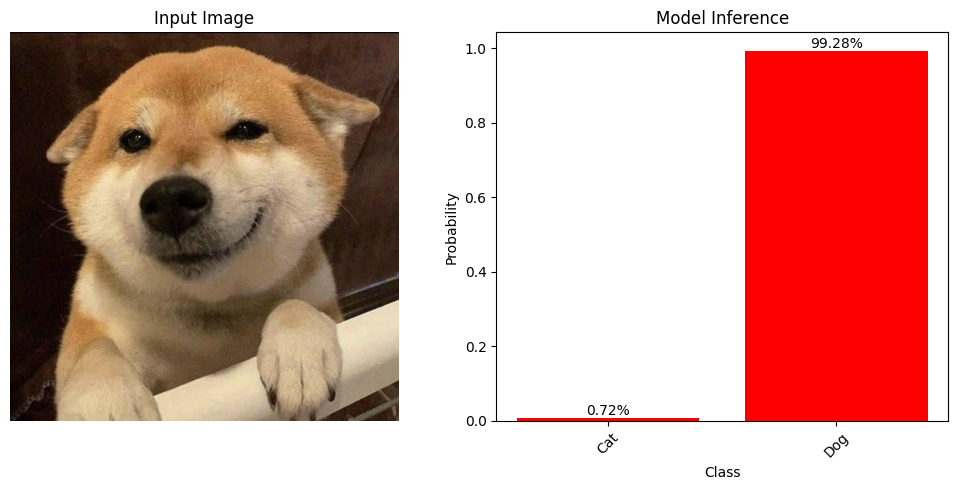

In [84]:
# 5.4 Use the better-trained model to run inference-------------------------------------------------

class Q54():
    def Run_Inference(self):

        model_path = "Best_ResNet50_with_Random_Erasing.pth"
        model = resnet50(weights=None)

        model.fc = nn.Sequential(
            nn.Linear(2048, 1),
            nn.Sigmoid()
        )

        # state_dict 為 model weights and bias
        model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))
        model.eval()

        transform = transforms.Compose([
            transforms.Resize(224),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ]) # 如果不做 Normalize，輸入的數據分佈與模型訓練時的不同，會導致輸出錯誤

        image_path = "Hw2_Q5_inference_dataset"
        sub_dirs = ['Cat', 'Dog']

        selected_dir = random.choice(sub_dirs)
        selected_dir_path = os.path.join(image_path, selected_dir)

        image_files = [f for f in os.listdir(selected_dir_path) if f.endswith('.jpg')]
        selected_image = random.choice(image_files)

        selected_image_path = os.path.join(selected_dir_path, selected_image)
        image = PILImage.open(selected_image_path).convert("RGB")

        image_tensor = transform(image).unsqueeze(0) # [3,244,244] -> [1,3,244,244] mean batch_size = 1
        class_dic = {0:'Cat', 1:'Dog'}

        # inference
        with torch.no_grad():

            output = model(image_tensor)

            dog_prob = output.item()
            cat_prob = 1 - dog_prob

            predicted = (output > 0.5).int().item()
            predicted_class = class_dic[predicted]

        # display
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.axis('off')
        plt.title("Input Image")

        print(f"Predicted Class: {predicted_class}")
        plt.subplot(1, 2, 2)
        bars = plt.bar([value for value in class_dic.values()], [cat_prob, dog_prob], color="red")
        for bar in bars:
            height = bar.get_height()  # 獲取柱子高度 = 即概率值
            plt.text(
                bar.get_x() + bar.get_width() / 2,  # x 位置：柱子中心
                height,                             # y 位置：柱子頂部
                f'{height:.2%}',                   # 文字內容：概率值（百分比格式）
                ha='center',                       # 水平對齊：居中
                va='bottom'                        # 垂直對齊：底部（文字在柱子上方）
            )
        plt.xlabel("Class")
        plt.ylabel("Probability")
        plt.title("Model Inference")
        plt.xticks(rotation=45)

        plt.tight_layout()
        plt.show()

q54 = Q54()
q54.Run_Inference()
